# Galactic Dynamo

This project is a part of the term project given in course P464 Plamsa Physics and Magnetohydrodynamics taught in Spring 2024 at NISER Bhubaneswar.

Submitted by: Chandan Kumar Sahu, Integrated MSc. SPS batch 19

Supervised by: Dr. Luke R. Chamandy, SPS, NISER



### Galactic Dynamo in the z-direction

We have the mean-field induction equation as 
$$ \dfrac{\partial \bar{B}}{\partial t} = \nabla \times \left[ \bar{V} \times \bar{B} + \mathcal{E} - \eta \left( \nabla \times \bar{B} \right) \right] $$
where $\mathcal{E} = \left( \alpha \bar{B} \right) - \eta_t \left( \nabla \times \bar{B} \right)$

We will solve the equations in the cylindrical coordinates (r, $\phi$, z) with the origin at the galactic centre and the z-axis parallel to the galactic angular velocity. However, to simplify things, lets make some approximations.

1. Omit the terms involving $\bar{V} \times \bar{B}$ and $\alpha$. We will land up on just the diffusion equation.
$$ \dfrac{\partial \bar{B}}{\partial t} = - \nabla \times \left[ \eta_T \left( \nabla \times \bar{B} \right) \right] $$
where $\eta_T = \eta + \eta_t$

2. Take $\eta_T$ independent of $B$. Our equation becomes
$$ \dfrac{\partial \bar{B}}{\partial t} = - \eta_T \left[ \nabla \times \left( \nabla \times \bar{B} \right) \right] $$
But $\nabla \times \left( \nabla \times \bar{B} \right) = \nabla \left( \nabla \cdot \bar{B} \right) - \nabla^2 \bar{B} $ and $\nabla \cdot \bar{B} = 0$ (Gauss's Law), so we finally have
$$ \dfrac{\partial \bar{B}}{\partial t} = \eta_T \nabla^2 \bar{B} $$

This is the Fickian diffusion equation. We will solve this equation numerically.



2. No radial or azimuthal variation of the magnetic field $\left(\dfrac{\partial }{\partial r} = \dfrac{\partial }{\partial \phi} = 0 \right)$. So the equation opens as

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= - \frac{\partial}{\partial z}\left(\alpha \bar{B}_\phi\right) + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= r \frac{\partial \Omega}{\partial r} \bar{B}_r + r \frac{\partial \Omega}{\partial z} \bar{B}_z + \frac{\partial}{\partial z}\left(\alpha \bar{B}_r\right) + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$

3. All terms involving $\alpha$ and $\Omega$ are ignored since $\alpha$ is negligible.

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$

5. Near the disc mid-plane, the variation of $\Omega$ with $z$ can be neglected, $\dfrac{\partial }{\partial z} \approx 0$ for $|z| \approx 0$ because of the symmetry $\Omega(r, z) = \Omega(r, z)$.

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$



The following component-wise equations are obtained:

Upon applying the approximations, we obrtain the following equation: 

This equation is basically the diffusion equation. We will solve this equation numerically using the following code.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Constants and parameters
eta_T = 2e-4  # magnetic diffusivity
t_max = 500  # total simulation time
z_max = 1.0  # thickness of the disc
r_max = 1.0  # radius of the disc
dt = 0.05  # time step
dz = 0.01  # spatial step in z direction
dr = 0.01  # spatial step in r direction

# Discretization
Nt = int(t_max / dt) + 1    # number of time steps
Nz = int(z_max / dz) + 1    # number of spatial steps in z direction
Nr = int(r_max / dr) + 1    # number of spatial steps in r direction
t_values = np.linspace(0, t_max, Nt)    # array of time values
z_values = np.linspace(0, z_max, Nz)    # array of z values
r_values = np.linspace(0, r_max, Nz)    # array of r values

# Initialize temperature array with the specified quadratic initial condition
B_z = np.zeros((Nt, Nz))
B_r = np.zeros((Nt, Nz))
B_phi = np.zeros((Nt, Nz))

# Initial conditions for the magnetic field in z, r and phi directions
B_z[0, :] = -300*(z_values-0.5)*np.exp(-2*(z_values-0.5)**2)
B_r[0, :] = 100*np.exp(-5*(z_values)**2)
B_phi[0, :] = -1000*(z_values-0.5)*np.exp(-20*(z_values-0.5)**2)
Omega = 5*np.exp(-5*(r_values)**2)

# Boundary conditions in the z direction
B_z[:, 0] = B_z[:, 1]  # Insulated top end of the disc
B_z[:, -1] = B_z[:, -2]  # Insulated bottom end of the disc

# Boundary conditions in the r direction
B_r[:, 0] = B_r[:, 1]  # Insulated centre of the disc
B_r[:, -1] = B_r[:, -2]  # Insulated at the edge of the disc

# Boundary conditions in the phi direction
B_phi[:, 0] = B_phi[:, 1]  # Insulated left end of the disc
B_phi[:, -1] = B_phi[:, -2]  # Insulated right end of the disc

# Finite difference method in z direction
for n in (range(0, Nt - 1)):
    for i in range(1, Nz - 1):
        B_z[n + 1, i] = B_z[n, i] + eta_T * dt / dz**2 * (B_z[n, i + 1] - 2 * B_z[n, i] + B_z[n, i - 1])

    # Maintain the temperature at the insulated left end
    B_z[n + 1, 0] = B_z[n, 1]
    B_z[n + 1, -1] = B_z[n, -2]

# Finite difference method in r direction
for n in (range(0, Nt - 1)):
    for i in range(1, Nz - 1):
        B_r[n + 1, i] = B_r[n, i] + eta_T * dt / dz**2 * (B_r[n, i + 1] - 2 * B_r[n, i] + B_r[n, i - 1])

    # Maintain the temperature at the insulated left end
    B_r[n + 1, 0] = B_r[n, 1]
    B_r[n + 1, -1] = B_r[n, -2]

# Finite difference method in phi direction
for n in (range(0, Nt - 1)):
    for i in range(1, Nz - 1):
        B_phi[n + 1, i] = B_phi[n, i] + dt / dr * r_values[i]*(Omega[i]-Omega[i-1])*B_r[n, i] + eta_T * dt / dz**2 * (B_phi[n, i + 1] - 2 * B_phi[n, i] + B_phi[n, i - 1])

    # Maintain the temperature at the insulated left end
    B_phi[n + 1, 0] = B_phi[n, 1]
    B_phi[n + 1, -1] = B_phi[n, -2]



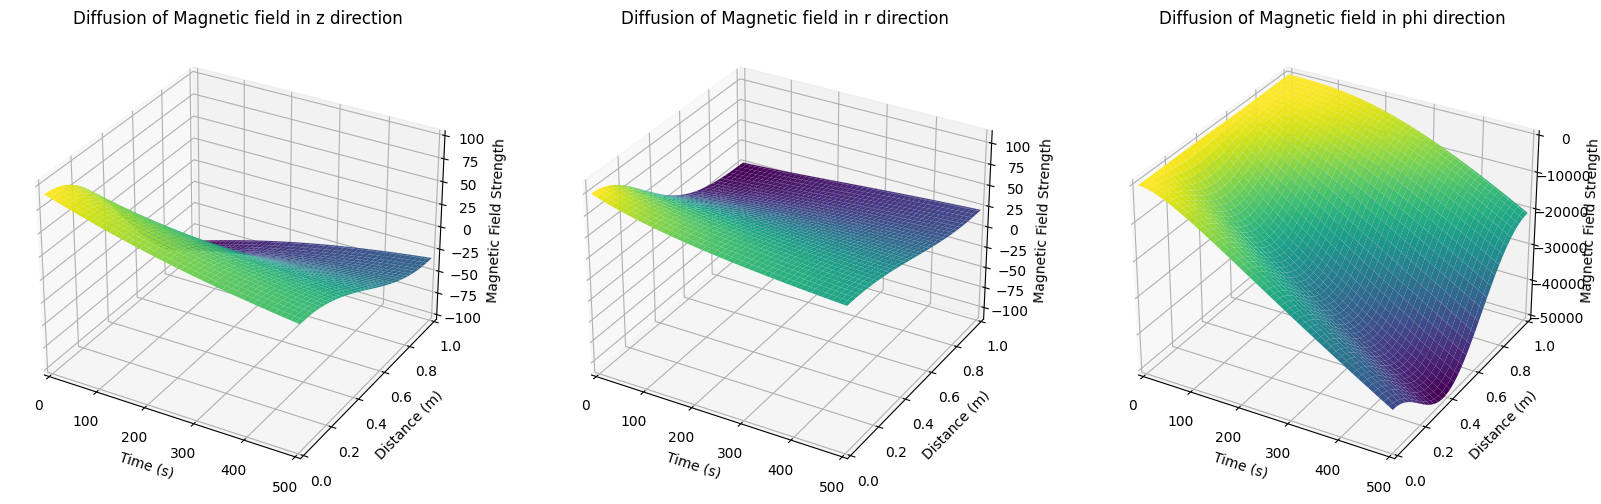

In [2]:

# Create a 3D surface plot
Z_values, T_values = np.meshgrid(z_values, t_values)
R_values, T_values = np.meshgrid(z_values, t_values)
Phi_values, T_values = np.meshgrid(z_values, t_values)


# make three 3D subplots for z, r and phi
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(T_values, Z_values, B_z, cmap='viridis')
ax1.set_xlim(0, t_max)
ax1.set_ylim(0, z_max)
ax1.set_zlim(np.min(B_z)-10, np.max(B_z)+10)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Distance (m)')
ax1.set_zlabel('Magnetic Field Strength')
ax1.set_title('Diffusion of Magnetic field in z direction')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(T_values, R_values, B_r, cmap='viridis')
ax2.set_xlim(0, t_max)
ax2.set_ylim(0, z_max)
ax2.set_zlim(-np.max(B_r)-10, np.max(B_r)+10)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Distance (m)')
ax2.set_zlabel('Magnetic Field Strength')
ax2.set_title('Diffusion of Magnetic field in r direction')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(T_values, Phi_values, B_phi, cmap='viridis')
ax3.set_xlim(0, t_max)
ax3.set_ylim(0, z_max)
ax3.set_zlim(np.min(B_phi)-10, np.max(B_phi)+10)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Distance (m)')
ax3.set_zlabel('Magnetic Field Strength')
ax3.set_title('Diffusion of Magnetic field in phi direction')

plt.show()


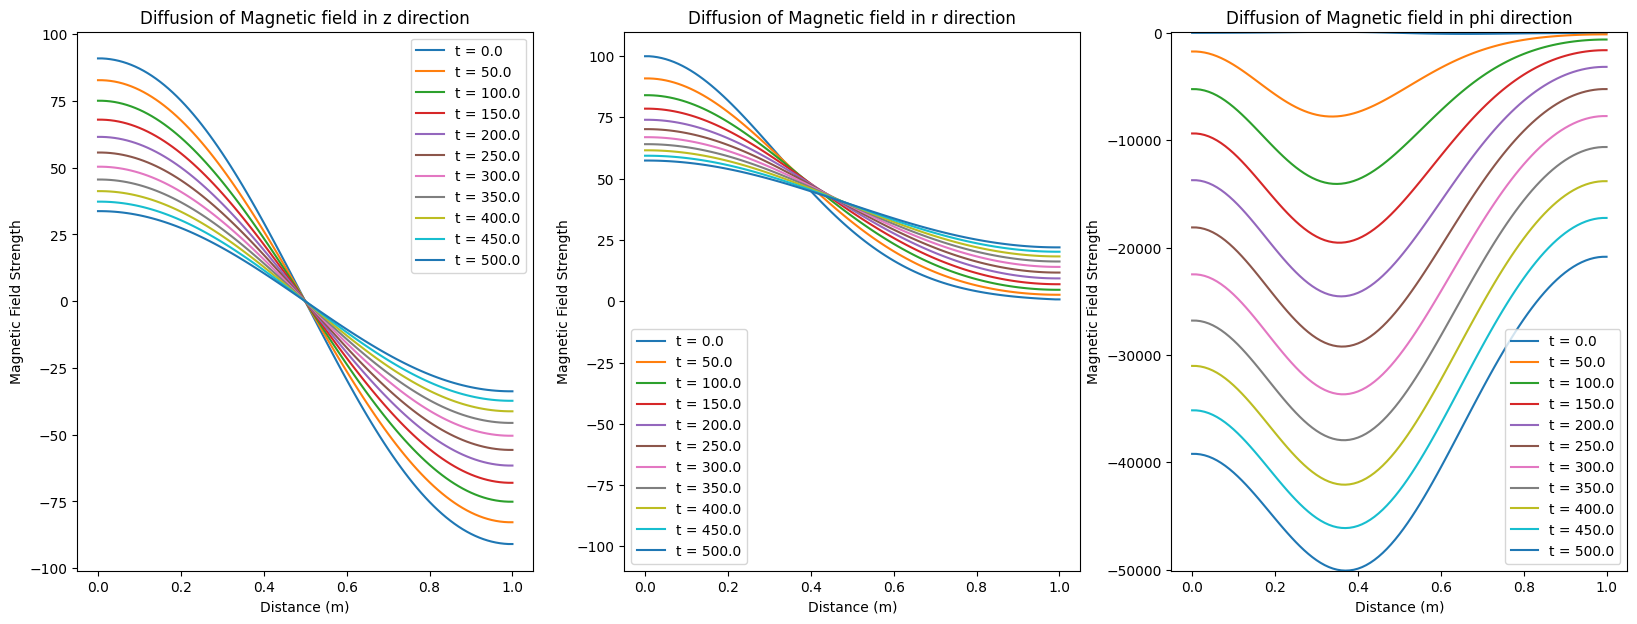

In [3]:

# Create 2D plots
plt.figure(figsize=(20, 7))

plt.subplot(131)
for i in (range(0, Nt, int(Nt/10))):
    plt.plot(z_values, B_z[i, :], label=f't = {t_values[i]:.1f}')
plt.xlabel('Distance (m)')
plt.ylabel('Magnetic Field Strength')
plt.title('Diffusion of Magnetic field in z direction')
plt.ylim(np.min(B_z)-10, np.max(B_z)+10)
plt.legend()

plt.subplot(132)
for i in (range(0, Nt, int(Nt/10))):
    plt.plot(z_values, B_r[i, :], label=f't = {t_values[i]:.1f}')
plt.xlabel('Distance (m)')
plt.ylabel('Magnetic Field Strength')
plt.title('Diffusion of Magnetic field in r direction')
plt.ylim(-np.max(B_r)-10, np.max(B_r)+10)
plt.legend()

plt.subplot(133)
for i in (range(0, Nt, int(Nt/10))):
    plt.plot(z_values, B_phi[i, :], label=f't = {t_values[i]:.1f}')
plt.xlabel('Distance (m)')
plt.ylabel('Magnetic Field Strength')
plt.title('Diffusion of Magnetic field in phi direction')
plt.ylim(np.min(B_phi)-10, np.max(B_phi)+10)
plt.legend()

plt.show()

2. No radial or azimuthal variation of the magnetic field $\left(\dfrac{\partial }{\partial r} = \dfrac{\partial }{\partial \phi} = 0 \right)$. So the equation opens as

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= - \frac{\partial}{\partial z}\left(\alpha \bar{B}_\phi\right) + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= r \frac{\partial \Omega}{\partial r} \bar{B}_r + r \frac{\partial \Omega}{\partial z} \bar{B}_z + \frac{\partial}{\partial z}\left(\alpha \bar{B}_r\right) + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$

3. All terms involving $\alpha$ and $\Omega$ are ignored since $\alpha$ is negligible.

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$

5. Near the disc mid-plane, the variation of $\Omega$ with $z$ can be neglected, $\dfrac{\partial }{\partial z} \approx 0$ for $|z| \approx 0$ because of the symmetry $\Omega(r, z) = \Omega(r, z)$.

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$



The following component-wise equations are obtained:

Upon applying the approximations, we obrtain the following equation: 

This equation is basically the diffusion equation. We will solve this equation numerically using the following code.

